# Lendo do Banco de dados

- Lucas Mafra - 12/0126443
- Luíza Aguiar Hansen - 140026711

In [1]:
from __future__ import print_function
from datetime import date, datetime, timedelta
import mysql.connector

In [2]:
cnx = mysql.connector.connect(user='root', database='estudos_em')
cursor = cnx.cursor()

In [3]:
sql = "SELECT * FROM alunos where sexo = 2"
cursor.execute(sql)
results = cursor.fetchall()
print(results[1])

(100068, '2', '1986-06-15 00:00:00.000', '128', '1', '1', '32', 1, 1, '20032', '20032', '4096', '20081', '1024', '240', '232')


In [4]:
cnx.close()

# Código

In [5]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [6]:
import numpy as np
import numpy.linalg as la
import csv
import sqlite3

transformando a tupla em matriz

In [7]:
lista = []
for y in range(0, len(results)):
    lista.append([])
    for x in range(len(results[y])):
        lista[y].append(0)
        lista[y][x] = results[y][x]

utiliza uma parte da matriz

In [8]:
matrix_general = lista[0:5000]
print(matrix_general[5])


[101528, '2', '1985-02-24 00:00:00.000', '128', '1', '1', '32', 2, 2, '20041', '20041', '128', '20092', '1024', '180', '178']


# Curva de Andrews - Mulheres 
Análise das formas de saída do curso

In [9]:
print(matrix_general[0])

for y in range(0, len(matrix_general)):
    del(matrix_general[y][3]) #deletando UF
    del(matrix_general[y][2]) #deletando Data Nascimento
    del(matrix_general[y][1]) #deletando Sexo
    del(matrix_general[y][0]) #deletando ID
    
    for x in range(0, len(matrix_general[y])):
        if(matrix_general[y][x] != ''):
            matrix_general[y][x] = int(matrix_general[y][x])
        else:
            matrix_general[y][x] = 0
        if(x == 9): 
            if(matrix_general[y][9] != 1 and matrix_general[y][9] != 1024): # 1 = Ativo, 1024 = Formatura
                matrix_general[y][9] = 2 # Pessoas Desligadas
            if(matrix_general[y][9] == 1024):
                matrix_general[y][9] = 3  # Pessoas Formadas
    

print(matrix_general[0])
print(len(matrix_general))
print(len(lista))
print(lista[0])


[100066, '2', '1985-03-29 00:00:00.000', '128', '1', '1', '64', 64, 8, '20032', '20032', '4096', '20081', '1024', '274', '282']
[1, 1, 64, 64, 8, 20032, 20032, 4096, 20081, 3, 274, 282]
5000
6778
[1, 1, 64, 64, 8, 20032, 20032, 4096, 20081, 3, 274, 282]


In [10]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

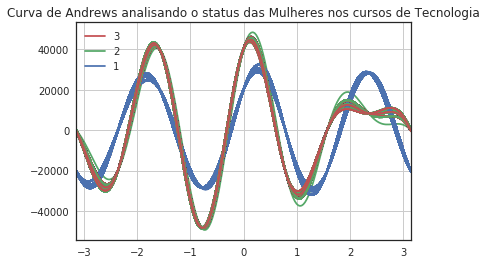

In [39]:
sns.set(style="white", color_codes=True)


bxg = pd.DataFrame(matrix_general)
# the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do

#print(bxg.head())

# Let's see how many examples we have of each species

andrews_curves(bxg, 9, color=['r','g','b'])


plt.title("Curva de Andrews analisando o status das Mulheres nos cursos de Tecnologia")
plt.legend(loc = 'best')
plt.show()


# Coordenadas paralelas

      0   1    2   3   4      5      6     7      8   9    10   11
0      1   1   64  64   8  20032  20032  4096  20081   3  274  282
1      1   1   32   1   1  20032  20032  4096  20081   3  240  232
2      1   1   32   1   1  20032  20032    16  20042   2  240    6
3      1   1    1   2   2  20041  20041   128  20091   2  180  110
4      1   1   32   2   2  20041  20041   128  20061   2  180   42
5      1   1   32   2   2  20041  20041   128  20092   3  180  178
6      1   1   32  64   8  20041  20041   128  20082   3  274  255
7      1   1   32  64   8  20041  20041   128  20092   3  274  249
8      1   1   32  16  16  20041  20041   128  20092   2  244  156
9      1   1   32   1   1  20041  20041   128  20081   3  240  226
10     1   1   32  16  16  20041  20041   128  20081   3  244  222
11     1   1   32  16  16  20041  20041   128  20081   3  244  240
12     1   1  128   1   1  20041  20041   128  20061   2  240   80
13     1   1    2   1   1  20041  20041   128  20102   2  240 

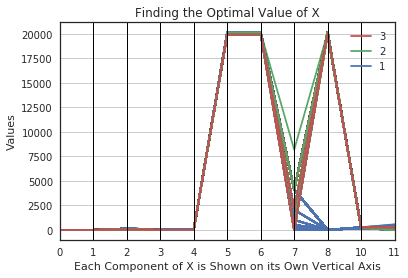

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

data = pd.DataFrame(matrix_general)
#data = pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
data2 = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
print(data2)
parallel_coordinates(data2, 9,color=['r','g','b'])
plt.xlabel("Each Component of X is Shown on its Own Vertical Axis")
plt.ylabel("Values")
plt.title("Finding the Optimal Value of X")
plt.show()

# PCA

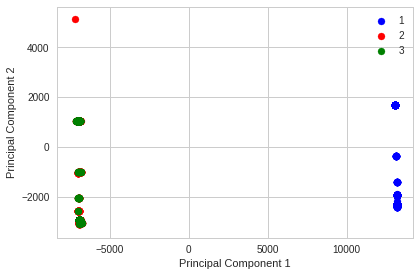

In [30]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import radviz
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.DataFrame(matrix_general)
# iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

X_std = iris.ix[:,0:11].values
y = iris.ix[:,9].values
# Let's see how many examples we have of each species
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2, 3),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


plt.show()

https://xaoquadrado.wordpress.com/2014/06/24/1161/

# Calculando a matriz de covariância

In [14]:
data = pd.DataFrame(matrix_general)
cov = data.cov()

In [15]:
cov

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.152187,0.161875,4.798436,0.275143,0.208665,4.626031,4.569586,2.952335e+01,-4.884566e+02,-0.043832,0.196789,-6.836487
1,0.161875,1.194989,5.660171,1.575964,1.618010,30.200754,30.147371,-1.664388e+02,-2.836458e+03,-0.219188,-0.470948,-15.675782
2,4.798436,5.660171,987.474948,3.082097,14.670555,50.862769,48.002600,1.723500e+03,4.323907e+03,-0.318119,-33.876655,-204.934913
3,0.275143,1.575964,3.082097,518.537436,92.547500,175.386148,171.781548,-9.255964e+02,-2.570377e+04,-0.976991,433.065096,304.358137
4,0.208665,1.618010,14.670555,92.547500,97.865275,115.936654,115.350920,-7.876075e+02,-2.007896e+04,-1.114261,77.331010,58.112979
5,4.626031,30.200754,50.862769,175.386148,115.936654,2852.763424,2844.255130,-2.042939e+04,-2.704042e+05,-22.785331,-44.415943,-1516.500718
6,4.569586,30.147371,48.002600,171.781548,115.350920,2844.255130,2857.812151,-2.048086e+04,-2.708596e+05,-22.795094,-41.309005,-1473.608947
7,29.523353,-166.438808,1723.500078,-925.596418,-787.607473,-20429.394742,-20480.858083,3.212383e+06,2.881220e+06,239.908410,-317.677372,19937.888396
8,-488.456647,-2836.457876,4323.907339,-25703.769037,-20078.961879,-270404.220242,-270859.613310,2.881220e+06,9.183821e+07,6162.561918,-26100.649448,108772.433833
9,-0.043832,-0.219188,-0.318119,-0.976991,-1.114261,-22.785331,-22.795094,2.399084e+02,6.162562e+03,0.561768,-0.327441,30.708959


In [16]:
# plt.imshow(cov, cmap='hot', interpolation='none')  
# plt.colorbar()  
# plt.xticks(range(len(cov)), cov.columns)  
# plt.yticks(range(len(cov)), cov.columns);  
# # plt.savefig("correl.png")  
# plt.show()  

In [17]:
corr = data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.379585,0.391425,0.030973,0.054069,0.222018,0.219115,0.042224,-0.130655,-0.149909,0.016771,-0.196619
1,0.379585,1.000000,0.164772,0.063310,0.149618,0.517253,0.515882,-0.084949,-0.270759,-0.267520,-0.014323,-0.160889
2,0.391425,0.164772,1.000000,0.004307,0.047192,0.030304,0.028575,0.030601,0.014358,-0.013507,-0.035841,-0.073170
3,0.030973,0.063310,0.004307,1.000000,0.410828,0.144202,0.141114,-0.022679,-0.117786,-0.057243,0.632273,0.149960
4,0.054069,0.149618,0.047192,0.410828,1.000000,0.219419,0.218117,-0.044420,-0.211795,-0.150278,0.259885,0.065908
5,0.222018,0.517253,0.030304,0.144202,0.219419,1.000000,0.996136,-0.213407,-0.528286,-0.569173,-0.027647,-0.318559
6,0.219115,0.515882,0.028575,0.141114,0.218117,0.996136,1.000000,-0.213756,-0.528708,-0.568913,-0.025690,-0.309275
7,0.042224,-0.084949,0.030601,-0.022679,-0.044420,-0.213407,-0.213756,1.000000,0.167746,0.178588,-0.005893,0.124809
8,-0.130655,-0.270759,0.014358,-0.117786,-0.211795,-0.528286,-0.528708,0.167746,1.000000,0.857968,-0.090548,0.127347
9,-0.149909,-0.267520,-0.013507,-0.057243,-0.150278,-0.569173,-0.568913,0.178588,0.857968,1.000000,-0.014524,0.459692


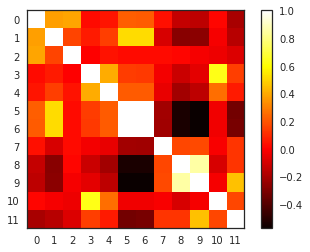

In [18]:
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);  
# plt.savefig("correl.png")  
plt.show()  

# Autovalores e Autovetores

autovalores da matriz de covariância representam a variância que será observada quando os dados originais forem projetados no eixo dado pelo autovetor correspondente. Um determinado autovalor informa a “variância explicada” (Explained Variance) pelo seu componente principal (autovetor) correspondente.

In [19]:
w,v=la.eig(cov)

autovalor

In [20]:
w

array([  9.19335282e+07,   3.11898774e+06,   8.35806256e+03,
         3.46209099e+03,   1.12597763e+03,   9.79228620e+02,
         2.28915791e+02,   7.48192005e+01,   1.08185450e+01,
         8.56649948e-01,   1.09327031e-01,   7.49821313e-02])

autovetor

In [21]:
v

array([[ -5.30025911e-06,  -1.45263070e-05,   9.37085026e-04,
         -6.58865132e-04,   3.85149949e-04,  -4.64374152e-03,
         -9.66392535e-04,   2.91484180e-04,   1.76263310e-03,
         -1.18899798e-01,   9.73303007e-01,   1.96257341e-01],
       [ -3.08977134e-05,   2.38873666e-05,   2.60285919e-03,
         -7.11707815e-03,  -5.08711383e-04,  -5.04417808e-03,
         -1.76076783e-03,  -4.81915647e-03,   5.49883752e-03,
         -9.92504243e-01,  -1.21625697e-01,   1.68022825e-03],
       [  4.76110098e-05,  -5.06931927e-04,   3.24900753e-02,
         -7.01501774e-03,  -3.79678376e-02,  -9.98165346e-01,
         -2.90207692e-02,   1.50888956e-02,  -9.01417837e-04,
          5.68256485e-03,  -3.94097783e-03,  -8.92231327e-04],
       [ -2.79777952e-04,   2.87539301e-05,  -3.79534167e-02,
         -8.55071168e-02,   5.30528012e-01,  -4.13779973e-02,
          8.15299529e-01,   2.07649758e-01,  -1.54683202e-02,
         -2.11485318e-03,   2.08096323e-04,  -5.94186005e-04],
    

# Ordenação dos autovalores e seus autovetores correspondentes em ordem decrescente.

In [22]:
ind=np.argsort(w)[::-1]
w_dec=w[ind]
v_dec=v[ind]

In [23]:
w_dec

array([  9.19335282e+07,   3.11898774e+06,   8.35806256e+03,
         3.46209099e+03,   1.12597763e+03,   9.79228620e+02,
         2.28915791e+02,   7.48192005e+01,   1.08185450e+01,
         8.56649948e-01,   1.09327031e-01,   7.49821313e-02])

In [24]:
v_dec

array([[ -5.30025911e-06,  -1.45263070e-05,   9.37085026e-04,
         -6.58865132e-04,   3.85149949e-04,  -4.64374152e-03,
         -9.66392535e-04,   2.91484180e-04,   1.76263310e-03,
         -1.18899798e-01,   9.73303007e-01,   1.96257341e-01],
       [ -3.08977134e-05,   2.38873666e-05,   2.60285919e-03,
         -7.11707815e-03,  -5.08711383e-04,  -5.04417808e-03,
         -1.76076783e-03,  -4.81915647e-03,   5.49883752e-03,
         -9.92504243e-01,  -1.21625697e-01,   1.68022825e-03],
       [  4.76110098e-05,  -5.06931927e-04,   3.24900753e-02,
         -7.01501774e-03,  -3.79678376e-02,  -9.98165346e-01,
         -2.90207692e-02,   1.50888956e-02,  -9.01417837e-04,
          5.68256485e-03,  -3.94097783e-03,  -8.92231327e-04],
       [ -2.79777952e-04,   2.87539301e-05,  -3.79534167e-02,
         -8.55071168e-02,   5.30528012e-01,  -4.13779973e-02,
          8.15299529e-01,   2.07649758e-01,  -1.54683202e-02,
         -2.11485318e-03,   2.08096323e-04,  -5.94186005e-04],
    

In [25]:
la.norm(v[0])

0.99999999999999944

In [26]:
la.norm(v[1])

1.0000000000000488

In [27]:
np.dot(v[0],v[1])

-3.556599459386689e-13

taxa de variância explicada 

In [28]:
EVR=w/np.sum(w)
EVR

array([  9.67041805e-01,   3.28083953e-02,   8.79178257e-05,
         3.64174723e-05,   1.18440732e-05,   1.03004315e-05,
         2.40794783e-06,   7.87017491e-07,   1.13799454e-07,
         9.01103578e-09,   1.15000275e-09,   7.88731347e-10])